In [1]:
!nvidia-smi

Mon Nov 11 22:49:57 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 430.26       Driver Version: 430.26       CUDA Version: 10.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 106...  Off  | 00000000:01:00.0 Off |                  N/A |
| N/A   54C    P2    22W /  N/A |    434MiB /  6078MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Load dataset

In [2]:
import torchvision as tv
import torch
# stl_10 = tv.datasets.STL10('stl_10', download=True)
cifar_train = tv.datasets.CIFAR100('cifar', train=True, transform=None, target_transform=None, download=True)
# get the correctly formatted np arrays
from torchvision.utils import save_image

cifar_train_transform = torch.from_numpy(cifar_train.data).transpose(1, 3).transpose(2, 3).float()
cifar_train_transform = (cifar_train_transform / 255).float()
cifar_train_transform_sample = cifar_train_transform.narrow(0, 0, 5000)

Files already downloaded and verified


In [3]:
import os
train_img_dir = 'cifar_imgs_final/'
sub_train_img_dir = 'cifar_imgs_final/inside/'
if not os.path.exists(train_img_dir): 
    os.mkdir( os.getcwd()+'/'+train_img_dir)
if not os.path.exists(sub_train_img_dir): 
    os.mkdir(os.getcwd()+'/'+sub_train_img_dir)

In [4]:
img_dir = sub_train_img_dir
for index, sample in enumerate(cifar_train_transform):
    index = index+1
    if index % 1000 == 0:
        print(index)
        save_image(sample ,img_dir + 'img_{index}.jpg'.format(index=index))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000


In [59]:
!python train_cifar.py --num_epochs=100 --batch_size=2 --num_workers=1 --save_step=500 --log_step=50

Namespace(batch_size=2, crop_size=224, image_dir='cifar_imgs_final/', learning_rate=0.001, log_step=50, model_path='model/', num_epochs=100, num_workers=1, save_step=500)
Traceback (most recent call last):
  File "train_cifar.py", line 108, in <module>
    main(args)
  File "train_cifar.py", line 82, in main
    loss.backward()
  File "/home/k/anaconda3/envs/deep/lib/python3.7/site-packages/torch/tensor.py", line 150, in backward
    torch.autograd.backward(self, gradient, retain_graph, create_graph)
  File "/home/k/anaconda3/envs/deep/lib/python3.7/site-packages/torch/autograd/__init__.py", line 99, in backward
    allow_unreachable=True)  # allow_unreachable flag
RuntimeError: cuDNN error: CUDNN_STATUS_NOT_INITIALIZED


# Sample Imagenet.py

In [0]:
import torchvision as tv

# get test folder
cifar_test = tv.datasets.CIFAR100('cifar', train=False, transform=None, target_transform=None, download=True)

# get the correctly formatted np arrays
cifar_test_transform = torch.from_numpy(cifar_test.data).transpose(1, 3).transpose(2, 3).float()
cifar_test_transform = cifar_test_transform / 255
cifar_test_transform_sample = cifar_test_transform.narrow(0, 0, 1000).float()
cifar_test_transform_sample_small= cifar_test_transform.narrow(0, 0, 10).float()


0it [00:00, ?it/s]

 98%|█████████▊| 166420480/169001437 [00:11<00:00, 16663954.74it/s]

Extracting cifar/cifar-100-python.tar.gz to cifar


In [0]:
import os
train_img_dir = 'cifar_test/'
train_img_dir = 'cifar_test_small/'
sub_train_img_dir = 'cifar_test_small/inside/'
if not os.path.exists(train_img_dir): 
    os.mkdir(train_img_dir)
if not os.path.exists(sub_train_img_dir): 
    os.mkdir(sub_train_img_dir)

In [0]:
from torchvision.utils import save_image

img_dir = sub_train_img_dir
for index, sample in enumerate(cifar_test_transform_sample_small):
    index = index+1
    if index % 100 == 0:
        print(index)
        save_image(sample ,img_dir + 'img_{index}.jpg'.format(index=index))
    if index > 100:
        break

In [0]:
os.mkdir('../data/')
trial_dir = '../data/trial'
os.mkdir(trial_dir)

In [0]:
# decode function from training_layers.py
# trying to fix this function because its only producing black and white images so far
from skimage import color

def decode(data_l, conv8_313, rebalance=1):
    #print('data_l',type(data_l))
    print('shape',data_l.shape)
    # np.save(trial_dir+'/data_l.npy',data_l)
    data_l=data_l[0]+50
    data_l=data_l.cpu().data.numpy().transpose((1,2,0))
    conv8_313 = conv8_313[0]
    enc_dir = './resources'
    conv8_313_rh = conv8_313 * rebalance
    print('conv8',conv8_313_rh.size())
    class8_313_rh = F.softmax(conv8_313_rh,dim=0).cpu().data.numpy().transpose((1,2,0))
    #np.save('class8_313.npy',class8_313_rh)
    class8=np.argmax(class8_313_rh,axis=-1) # max of the last axis
    print('class8',class8.shape)
    cc = np.load(os.path.join(enc_dir, 'pts_in_hull.npy'))
    #data_ab = np.dot(class8_313_rh, cc)
    data_ab=cc[class8[:][:]]
    #data_ab=np.transpose(data_ab,axes=(1,2,0))
    #data_l=np.transpose(data_l,axes=(1,2,0))
    #data_ab = resize(data_ab, (224, 224,2))
    data_ab=data_ab.repeat(4, axis=0).repeat(4, axis=1)
    
    img_lab = np.concatenate((data_l, data_ab), axis=-1)
    img_rgb = color.lab2rgb(img_lab)

    return img_rgb


In [0]:
import torch
from torch.autograd import Variable
from skimage.color import lab2rgb
from model import Color_model
#from data_loader import ValImageFolder
import numpy as np
from skimage.color import rgb2lab, rgb2gray
import torch.nn as nn 
from PIL import Image
import scipy.misc
from torchvision import datasets, transforms
from training_layers import decode
import torch.nn.functional as F
import os
%matplotlib inline
import math,sys,os,numpy as np
from numpy.linalg import norm
from matplotlib import pyplot as plt
import imageio

scale_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.RandomCrop(224),
])

def load_image(image_path,transform=None):
    image = Image.open(image_path)
    
    if transform is not None:
        image = transform(image)
    image_small=transforms.Scale(56)(image)
    image_small=np.expand_dims(rgb2lab(image_small)[:,:,0],axis=-1)
    image=rgb2lab(image)[:,:,0]-50.
    image=torch.from_numpy(image).unsqueeze(0)
    
    return image,image_small

# plot a single image
def plot(im, interp=False):
  # takes a 
    f = plt.figure(figsize=(3,6), frameon=True)
    # tensor_image.permute(1, 2, 0)
    plt.imshow(im, interpolation=None if interp else 'none')


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


<All keys matched successfully>


Colorized:


/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


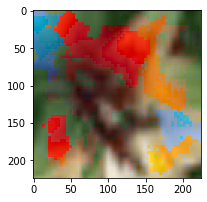

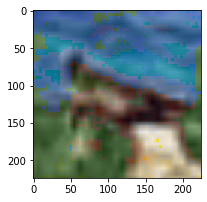

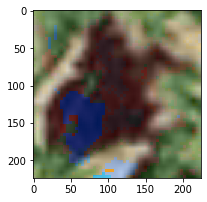

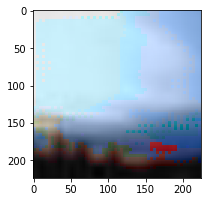

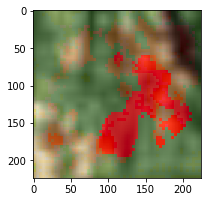

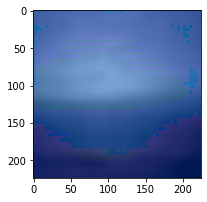

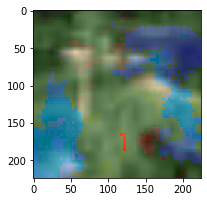

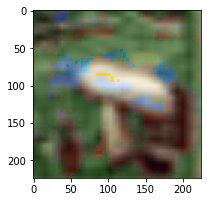

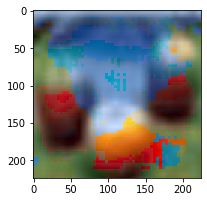

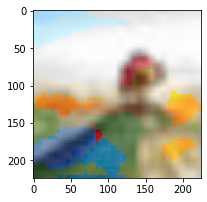

In [0]:
dirs = os.listdir( '/content/colorization/code/cifar_test_small/inside/' )
color_model = nn.DataParallel(Color_model()).cuda().eval()
color_model.load_state_dict(torch.load('model-5-500.ckpt'))

print("\nColorized:")
for file in dirs:
  # print(file)
    image,image_small=load_image(data_dir+file, scale_transform)
    image=image.unsqueeze(0).float().cuda()
    img_ab_313= color_model(image)
    out_max=np.argmax(img_ab_313[0].cpu().data.numpy(),axis=0)
    color_img = decode(image,img_ab_313)
    plot(color_img)
    plt.savefig( 'pred/'+file )

In [0]:
!zip -r pred.zip pred

  adding: pred/ (stored 0%)
  adding: pred/img_6.jpg (deflated 6%)
  adding: pred/img_3.jpg (deflated 7%)
  adding: pred/.ipynb_checkpoints/ (stored 0%)
  adding: pred/img_8.jpg (deflated 7%)
  adding: pred/img_9.jpg (deflated 9%)
  adding: pred/img_2.jpg (deflated 7%)
  adding: pred/img_5.jpg (deflated 11%)
  adding: pred/img_7.jpg (deflated 7%)
  adding: pred/img_4.jpg (deflated 7%)
  adding: pred/img_10.jpg (deflated 7%)
  adding: pred/img_1.jpg (deflated 8%)


In [0]:
!zip -r original.zip cifar_test_small

  adding: cifar_test_small/ (stored 0%)
  adding: cifar_test_small/inside/ (stored 0%)
  adding: cifar_test_small/inside/img_6.jpg (deflated 18%)
  adding: cifar_test_small/inside/img_3.jpg (deflated 18%)
  adding: cifar_test_small/inside/img_8.jpg (deflated 17%)
  adding: cifar_test_small/inside/img_9.jpg (deflated 22%)
  adding: cifar_test_small/inside/img_2.jpg (deflated 19%)
  adding: cifar_test_small/inside/img_5.jpg (deflated 24%)
  adding: cifar_test_small/inside/img_7.jpg (deflated 20%)
  adding: cifar_test_small/inside/img_4.jpg (deflated 18%)
  adding: cifar_test_small/inside/img_10.jpg (deflated 17%)
  adding: cifar_test_small/inside/img_1.jpg (deflated 20%)


In [0]:
# Spongebob

/usr/local/lib/python3.6/dist-packages/torchvision/transforms/transforms.py:211: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  "please use transforms.Resize instead.")


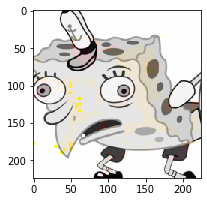

In [152]:
spo_path = "spo.jpg"

scale_transform = transforms.Compose([
    transforms.Scale(256),
    transforms.RandomCrop(224),
])

image,image_small=load_image( spo_path , scale_transform)
image=image.unsqueeze(0).float().cuda()
img_ab_313= color_model(image)
out_max=np.argmax(img_ab_313[0].cpu().data.numpy(),axis=0)
color_img = decode(image,img_ab_313)
plot(color_img)
plt.savefig( 'pred/'+file )